In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
def input_data():
  dataX, dataY = [], []
  with open('F:\\OneDrive - Hanoi University of Science and Technology\\Desktop\\NhomPPSPhan2\\MeanSquaredError\\ham_gamma.txt', 'r') as file:
    for line in file:
      # print(line)
      
      _X, _Y = line.split(' ')
      dataX.append(float(_X))
      dataY.append(float(_Y))
  
  if len(dataX) == len(dataY): 
    print('Input Satisfied !')
  else:
    print('Error ! ')

  dataX = np.asarray(dataX)
  dataY = np.asarray(dataY)
  return dataX, dataY

In [30]:
dataX, dataY = input_data()

Input Satisfied !


In [31]:
print(dataX)
print(dataY)

[1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4  1.45 1.5  1.55 1.6  1.65
 1.7  1.75 1.8  1.85 1.9  1.95 2.  ]
[1.      0.9735  0.95135 0.93304 0.91817 0.9064  0.89747 0.89115 0.88726
 0.88565 0.88623 0.88887 0.89352 0.90012 0.90864 0.91906 0.93138 0.94561
 0.96177 0.97988 1.     ]


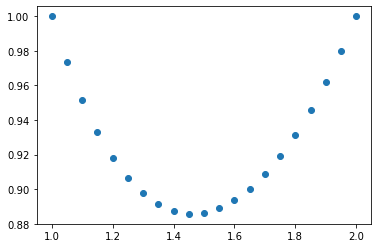

In [32]:
plt.scatter(dataX, dataY)

In [33]:
def u0(x):
  return 1
def u1(x):
  return x
def u2(x):
  return x**2
def u3(x):
  return x**3
def u4(x):
  return x**4
def u5(x):
  return np.sin(x)
def u6(x):
  return np.cos(x)
def u7(x):
  return np.sin(x)
def u8(x):
  return np.cos(x)
def u9(x):
  return np.exp(x)
def u10(x):
  return np.exp(-x)
def u11(x):
    return np.log(x)

In [34]:
def call_func(u, x):
  result = []
  for i in range(len(u)):
    temp = list(map(u[i], x))
    result.append(temp)

  return np.array(result).T

In [35]:
def vienquanh_inverse(A):
    n, _ = A.shape
    if n == 1:
        return 1 / A
    elif n > 1:
        start = 1 / A[0,0]
        for i in range(n-1):
            alpha11 = start
            alpha12 = A[:(i+1),i+1].reshape(i+1,1)
            alpha21 = A[i+1,:i+1]
            alpha22 = A[i+1,i+1]
            if i == 0:
                X = alpha11 * alpha12
            else:
                X = alpha11 @ alpha12
            if i == 0:
                Y = alpha21 * alpha11
            else :
                Y = alpha21 @ alpha11
                Y = Y.reshape(1,-1)
            if i == 0:
                theta = alpha22 - Y * alpha12
            else :
                theta = alpha22 - Y @ alpha12           
            if i == 0:
                beta11 = alpha11 + (1/theta) * (X*Y)
            else :
                beta11 = alpha11 + (1/theta) * (X@Y)            
            beta12 = -(1/theta) * X
            beta21 = -(1/theta) *Y
            beta22 = 1 / theta
            tempt_result = np.vstack((np.hstack((beta11,beta12)),np.hstack((beta21,beta22))))
            start = tempt_result
        return tempt_result

In [36]:
def mse(y_test, dataY):
  n = len(dataY)
  mse = 0
  for i in range(n):
    mse += (y_test[i] - dataY[i]) ** 2
  mse = np.sqrt(mse / n)
  return mse

In [37]:
# u = [u0,u1,u2,u3,u4,u10]
# u = [u2,u7]
u = [u0, u1, u2, u3, u11]

In [38]:
theta = call_func(u, dataX)
print(theta)

[[1.         1.         1.         1.         0.        ]
 [1.         1.05       1.1025     1.157625   0.04879016]
 [1.         1.1        1.21       1.331      0.09531018]
 [1.         1.15       1.3225     1.520875   0.13976194]
 [1.         1.2        1.44       1.728      0.18232156]
 [1.         1.25       1.5625     1.953125   0.22314355]
 [1.         1.3        1.69       2.197      0.26236426]
 [1.         1.35       1.8225     2.460375   0.30010459]
 [1.         1.4        1.96       2.744      0.33647224]
 [1.         1.45       2.1025     3.048625   0.37156356]
 [1.         1.5        2.25       3.375      0.40546511]
 [1.         1.55       2.4025     3.723875   0.43825493]
 [1.         1.6        2.56       4.096      0.47000363]
 [1.         1.65       2.7225     4.492125   0.50077529]
 [1.         1.7        2.89       4.913      0.53062825]
 [1.         1.75       3.0625     5.359375   0.55961579]
 [1.         1.8        3.24       5.832      0.58778666]
 [1.         1

In [39]:
M = theta.T @ theta 
print(M)

[[ 21.          31.5         49.175       79.5375       8.07037778]
 [ 31.5         49.175       79.5375     132.6166625   13.42192239]
 [ 49.175       79.5375     132.6166625  226.81246875  22.81430773]
 [ 79.5375     132.6166625  226.81246875 396.13199703  39.5215198 ]
 [  8.07037778  13.42192239  22.81430773  39.5215198    4.00945976]]


In [40]:
coef_matrix = np.linalg.pinv(M) @ theta.T @ dataY
#coef_matrix = vienquanh_inverse(M) @ theta.T @ dataY
print(coef_matrix)

[-2.23991118  4.18838608 -1.14340244  0.19490849 -3.06214611]


In [41]:
def find_y(dataX, u, coef_matrix):
  y = 0
  for i in range(len(u)):
    y += coef_matrix[i] * u[i](dataX)
  return y

In [42]:
y_test = find_y(dataX, u, coef_matrix)
print(y_test)

[0.99998095 0.97352134 0.95136606 0.93304305 0.91815923 0.90638759
 0.89745684 0.89114295 0.8872623  0.885666   0.8862352  0.8888771
 0.89352169 0.90011891 0.90863628 0.91905687 0.93137753 0.94560738
 0.96176652 0.97988488 1.0000012 ]


In [43]:
def graphic(dataX, dataY, u, coef_matrix):
  X_test = np.linspace(dataX.min(), dataY.max(), 10000)
  Y_test = []
  for i in range(len(X_test)):
    Y_test.append(find_y(X_test[i], u, coef_matrix))
  plt.scatter(dataX, dataY, s = 30, color = 'blue')

  plt.plot(X_test, Y_test, color = 'red')
    
  plt.tight_layout()
  # plt.ylim(7,10)
  plt.show()

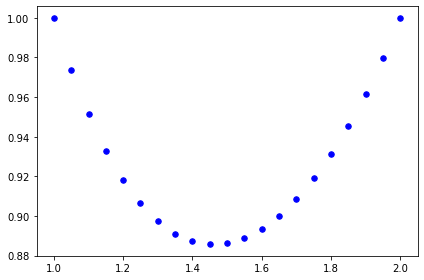

In [44]:
graphic(dataX, dataY, u, coef_matrix)

In [45]:
print('Sai so trung binh phuong: \n')
print(mse(y_test, dataY))

Sai so trung binh phuong: 

9.747673356982152e-06
